In [23]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from scipy import stats
import os 
working_directory=os.getcwd()
print(working_directory)
# Importing important libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


C:\Users\athar\Desktop\Project_3


In [24]:
df=pd.read_csv('heart.csv')

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Naming the features
features = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [27]:
# Determining principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
# Final DF
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [29]:
finalDf

,principal component 1,principal component 2,target
0,-0.051739,2.624022,1
1,-0.817441,-0.730375,1
2,-2.057599,-0.039098,1
3,-1.903043,-0.596701,1
4,-0.768371,0.412545,1
...,...,...,...
298,1.485287,-0.423483,0
299,-0.140325,-1.215922,0
300,2.681772,0.593019,0
301,2.170858,-2.166992,0


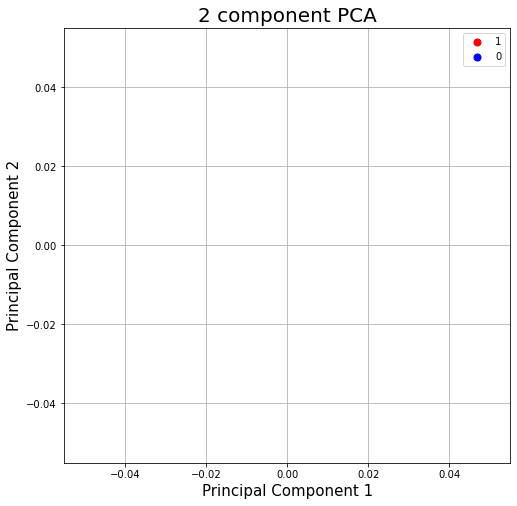

In [35]:
# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '0']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# Variance
pca.explained_variance_ratio_

array([0.23581966, 0.11229748])